In [1]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append(os.environ.get('PATH_OPENSKY'))
from user_eval import get_df_posts 
from news_outlet_eval import get_news_feed, get_posts_from_nos

dotenv.load_dotenv('.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_USER_POSTS = PATH_DATA + 'user_posts/'

PATH_RESULTS = os.environ.get('PATH_OPENSKY') + 'results/'

COLOR_POSITIVE = os.environ.get('COLOR_POSITIVE')
COLOR_NEUTRAL = os.environ.get('COLOR_NEUTRAL')
COLOR_NEGATIVE = os.environ.get('COLOR_NEGATIVE')

df_all_cutoff = pd.read_csv(PATH_RESULTS + 'nonnews_cutoff_v1.csv')
df_news_cutoff = pd.read_csv(PATH_RESULTS + 'news_cutoff_v1.csv')


In [2]:
df_all_cutoff

,post_id,user_id,date,labels,sent_label,sent_score,reply_to,thread_root
0,79799347,527934,2024-02-13 16:55:00,NaN,neutral,0.928,6369073.0,6369073.0
1,79799462,527934,2024-02-04 03:41:00,NaN,neutral,0.658,1960204.0,1960204.0
2,79800556,527934,2023-10-28 18:56:00,NaN,neutral,0.625,160257.0,160257.0
3,38539170,317609,2024-03-04 10:02:00,NaN,positive,0.984,38539124.0,38539124.0
4,38539863,317609,2024-02-18 12:01:00,NaN,positive,0.985,187711.0,187711.0
...,...,...,...,...,...,...,...,...
1350564,52363070,1057073,2023-08-24 03:50:00,NaN,neutral,0.680,18602800.0,18602800.0
1350565,52363077,1057073,2023-08-06 20:04:00,NaN,positive,0.455,11592045.0,11592045.0
1350566,68998727,1848807,2023-10-17 07:28:00,NaN,positive,0.977,2175936.0,2175936.0
1350567,177173027,3283530,2024-03-09 03:30:00,NaN,negative,0.884,65862.0,65862.0


In [3]:
df_nonnews_agg = df_all_cutoff.groupby(['reply_to', 'sent_label']).size().unstack()
df_nonnews_agg = df_nonnews_agg.fillna(0)
df_nonnews_norm = df_nonnews_agg.apply(lambda x: x / x.sum(), axis=1)
df_nonnews_norm

sent_label,negative,neutral,positive
reply_to,,,
14.0,0.000000,0.000000,1.000000
16.0,0.000000,0.000000,1.000000
47.0,0.000000,0.548387,0.451613
50.0,0.250000,0.666667,0.083333
94.0,0.010526,0.147368,0.842105
...,...,...,...
232915976.0,0.500000,0.500000,0.000000
232983743.0,0.000000,1.000000,0.000000
233081347.0,0.200000,0.700000,0.100000


In [4]:
df_news_cutoff

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,10657231,284413,bsky.social,2023-12-30 16:52:00,"and by the way, NYT, gtfo, you disgusting russ...",['eng'],8,0,0,10657232.0,379.0,10657232.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.945
1,10657233,284413,bsky.social,2023-12-30 16:41:00,"ah, yes…NYT. Unfortunately only 14..but hopefu...",['eng'],7,1,0,10657232.0,379.0,10657232.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.921
2,10657281,284413,bsky.social,2023-12-24 15:29:00,Reminds me of,['eng'],3,0,0,705616.0,379.0,705616.0,379.0,NaN,NaN,NaN,NaN,NaN,neutral,0.699
3,10657446,284413,bsky.social,2023-12-09 15:01:00,jesus christ… this is straight from medieval t...,['eng'],1,0,0,3158145.0,379.0,3158145.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.825
4,10657677,284413,bsky.social,2023-11-22 17:34:00,progressive..more like pro-hamas,['eng'],0,2,0,10657678.0,16202.0,10657678.0,16202.0,NaN,NaN,NaN,NaN,NaN,neutral,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,110584107,527683,bsky.social,2023-10-06 20:06:00,Are you kidding?\n\nThere are always people wh...,['eng'],3,1,0,4108566.0,379.0,4108566.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.929
9914,105014318,92560,bsky.social,2024-03-08 01:59:00,What a complete abdication of good journalism ...,['eng'],0,0,0,698597.0,9.0,698597.0,9.0,NaN,NaN,NaN,NaN,NaN,negative,0.790
9915,105014322,92560,bsky.social,2024-03-07 22:16:00,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576.0,379.0,127576.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.867
9916,105014501,92560,bsky.social,2024-01-05 08:08:00,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919.0,379.0,145919.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.882


In [5]:
df_news_agg = df_news_cutoff.groupby(['reply_to', 'sent_label']).size().unstack()
df_news_agg = df_news_agg.fillna(0)
df_news_norm = df_news_agg.apply(lambda x: x / x.sum(), axis=1)
df_news_norm

sent_label,negative,neutral,positive
reply_to,,,
517.0,1.000000,0.000000,0.000000
1619.0,0.840909,0.068182,0.090909
2233.0,0.600000,0.400000,0.000000
16974.0,0.900000,0.050000,0.050000
17188.0,0.909091,0.090909,0.000000
...,...,...,...
46067648.0,1.000000,0.000000,0.000000
57086120.0,0.800000,0.200000,0.000000
57086277.0,0.600000,0.400000,0.000000


In [6]:
df_nonnews_norm.sample(1104)

sent_label,negative,neutral,positive
reply_to,,,
29261772.0,0.000000,0.000000,1.000000
1467572.0,0.142857,0.428571,0.428571
13881075.0,0.000000,0.000000,1.000000
2324793.0,0.428571,0.571429,0.000000
466206.0,0.750000,0.000000,0.250000
...,...,...,...
23585952.0,0.500000,0.000000,0.500000
6002722.0,0.000000,0.500000,0.500000
8980350.0,0.250000,0.250000,0.500000


In [7]:
from scipy.stats import mannwhitneyu, norm

# Initialize variables
n_iterations = 1000
u_statistics = []

# Perform bootstrap procedure
for _ in range(n_iterations):
    # Bootstrap from df_nonnews_norm to form set 1
    set_1 = df_nonnews_norm.sample(n=len(df_news_norm), replace=True)
    set_2 = df_news_norm

    # Combine both sets
    combined = pd.concat([set_1, set_2])

    # Rank all posts from both sets combined from lowest to highest negative sentiment proportion
    combined['rank'] = combined['negative'].rank()

    # Sum the ranks for each set separately
    rank_sum_set_1 = combined.loc[set_1.index, 'rank'].sum()
    rank_sum_set_2 = combined.loc[set_2.index, 'rank'].sum()

    # Calculate the U statistic
    u_statistic, _ = mannwhitneyu(set_1['negative'], set_2['negative'], alternative='two-sided')
    u_statistics.append(u_statistic)

# Calculate the p-value
u_statistics = np.array(u_statistics)
mean_u = np.mean(u_statistics)
std_u = np.std(u_statistics)
z_score = (mean_u - len(set_1) * len(set_2) / 2) / std_u
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"Mean U statistic: {mean_u}")
print(f"Standard deviation of U statistic: {std_u}")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

Mean U statistic: 284686.6715
Standard deviation of U statistic: 10100.67658502824
Z-score: -32.14847300242433
P-value: 0.0


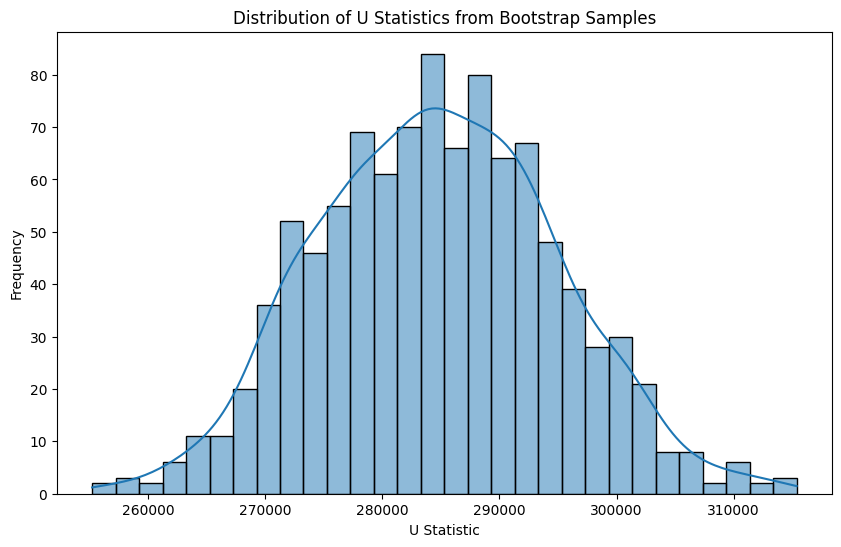

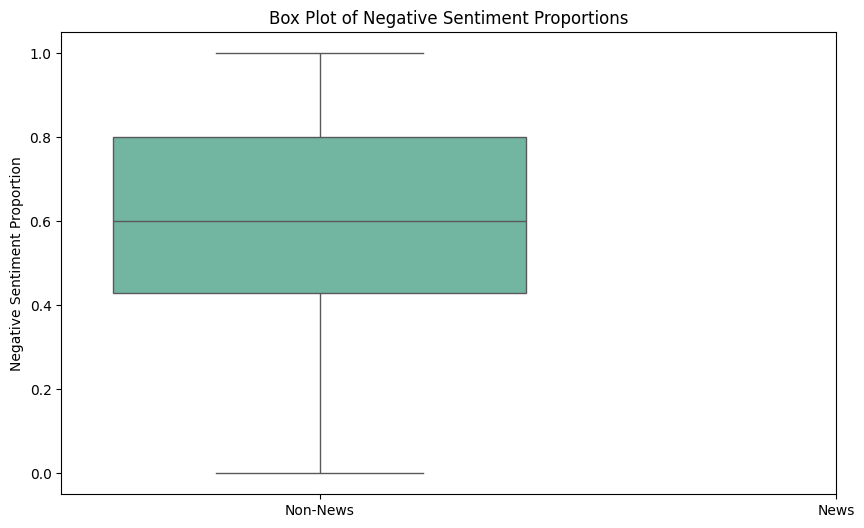

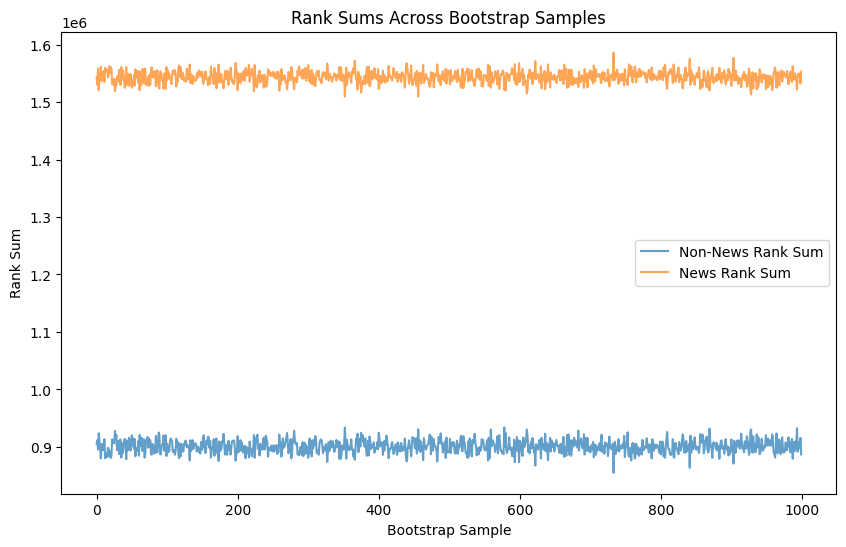

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of U Statistics
plt.figure(figsize=(10, 6))
sns.histplot(u_statistics, bins=30, kde=True)
plt.title('Distribution of U Statistics from Bootstrap Samples')
plt.xlabel('U Statistic')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Negative Sentiment Proportions
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df_nonnews_norm['negative'], df_news_norm['negative']], palette="Set2")
plt.xticks([0, 1], ['Non-News', 'News'])
plt.title('Box Plot of Negative Sentiment Proportions')
plt.ylabel('Negative Sentiment Proportion')
plt.show()

# Rank Sum Comparison
rank_sums_set_1 = []
rank_sums_set_2 = []

for _ in range(n_iterations):
    set_1 = df_nonnews_norm.sample(n=len(df_news_norm), replace=True)
    set_2 = df_news_norm
    combined = pd.concat([set_1, set_2])
    combined['rank'] = combined['negative'].rank()
    rank_sums_set_1.append(combined.loc[set_1.index, 'rank'].sum())
    rank_sums_set_2.append(combined.loc[set_2.index, 'rank'].sum())

plt.figure(figsize=(10, 6))
plt.plot(rank_sums_set_1, label='Non-News Rank Sum', alpha=0.7)
plt.plot(rank_sums_set_2, label='News Rank Sum', alpha=0.7)
plt.title('Rank Sums Across Bootstrap Samples')
plt.xlabel('Bootstrap Sample')
plt.ylabel('Rank Sum')
plt.legend()
plt.show()

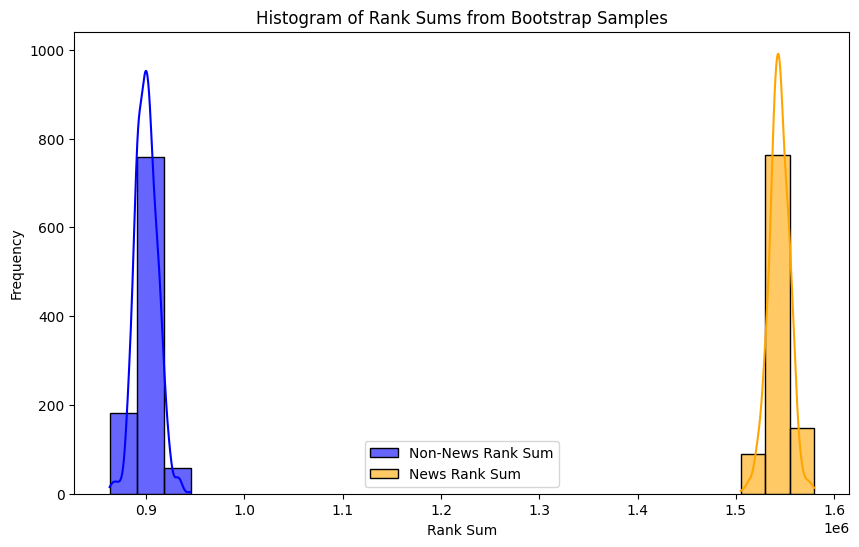

In [10]:
n_iterations = 1000
rank_sums_set_1 = []
rank_sums_set_2 = []

# Perform bootstrap procedure
for _ in range(n_iterations):
    set_1 = df_nonnews_norm.sample(n=len(df_news_norm), replace=True)
    set_2 = df_news_norm
    combined = pd.concat([set_1, set_2])
    combined['rank'] = combined['negative'].rank()
    rank_sums_set_1.append(combined.loc[set_1.index, 'rank'].sum())
    rank_sums_set_2.append(combined.loc[set_2.index, 'rank'].sum())

# Histogram of Rank Sums
plt.figure(figsize=(10, 6))
sns.histplot(rank_sums_set_1, bins=3, color='blue', label='Non-News Rank Sum', kde=True, alpha=0.6)
sns.histplot(rank_sums_set_2, bins=3, color='orange', label='News Rank Sum', kde=True, alpha=0.6)
plt.title('Histogram of Rank Sums from Bootstrap Samples')
plt.xlabel('Rank Sum')
plt.ylabel('Frequency')
plt.legend()
plt.show()